In [1]:
import pandas as pd
from keras.utils import HDF5Matrix
#from keras.preprocessing.image import ImageDataGenerator

x_train = HDF5Matrix('camelyonpatch_level_2_split_train_x.h5', 'x')
y_train = HDF5Matrix('camelyonpatch_level_2_split_train_y.h5', 'y')

x_valid = HDF5Matrix('camelyonpatch_level_2_split_valid_x.h5','x')
y_valid = HDF5Matrix('camelyonpatch_level_2_split_valid_y.h5','y')

x_test = HDF5Matrix('camelyonpatch_level_2_split_test_x.h5','x')
y_test = HDF5Matrix('camelyonpatch_level_2_split_test_y.h5','y')

train_meta = pd.read_csv('camelyonpatch_level_2_split_train_meta.csv', header=None)
valid_meta = pd.read_csv('camelyonpatch_level_2_split_valid_meta.csv', header=None)
test_meta = pd.read_csv('camelyonpatch_level_2_split_test_meta.csv', header=None)

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/utils/io_utils.py:60: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(datapath)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(train_meta.head())

     0        1        2            3                   4  \
0  NaN  coord_y  coord_x  tumor_patch  center_tumor_patch   
1  0.0    63104    43648        False               False   
2  1.0   148544    74048         True                True   
3  2.0    64192    78912         True                True   
4  3.0    98048    72128         True                True   

                            5  
0                         wsi  
1  camelyon16_train_tumor_104  
2  camelyon16_train_tumor_003  
3  camelyon16_train_tumor_089  
4  camelyon16_train_tumor_004  


In [3]:
print(train_meta.tail(10))

               0       1       2      3      4                            5
262135  262134.0  117824   36288   True   True   camelyon16_train_tumor_010
262136  262135.0  135296   58624   True   True   camelyon16_train_tumor_034
262137  262136.0   59392   26752   True   True   camelyon16_train_tumor_107
262138  262137.0  144320   62720  False  False  camelyon16_train_normal_063
262139  262138.0   20608  115584   True   True   camelyon16_train_tumor_101
262140  262139.0  164672   44160   True   True   camelyon16_train_tumor_025
262141  262140.0  155584   31296   True   True   camelyon16_train_tumor_042
262142  262141.0   28032  114944   True   True   camelyon16_train_tumor_101
262143  262142.0   51264   32960  False  False  camelyon16_train_normal_021
262144  262143.0  103040   46784   True   True   camelyon16_train_tumor_002


In [4]:
#NaN = train_meta[0][1:]
coord_y = train_meta[1][1:]
coord_x = train_meta[2][1:]
tumor_patch = train_meta[3][1:]
center_tumor_patch = train_meta[4][1:]
#wsi = train_meta[5][1:]

In [5]:
print(center_tumor_patch)

1         False
2          True
3          True
4          True
5         False
          ...  
262140     True
262141     True
262142     True
262143    False
262144     True
Name: 4, Length: 262144, dtype: object


In [6]:
dd = {'True': 1, 'False': 0, True: 1, False:0}

center_tumor_patch = center_tumor_patch.map(dd)
tumor_patch = tumor_patch.map(dd)

In [8]:
d = {'coord_y': coord_y, 'coord_x': coord_x, 'center_tumor_patch': center_tumor_patch}  
    
df = pd.DataFrame(d) 

In [9]:
print(df)

       coord_y coord_x  center_tumor_patch
1        63104   43648                   0
2       148544   74048                   1
3        64192   78912                   1
4        98048   72128                   1
5        27264   50688                   0
...        ...     ...                 ...
262140  164672   44160                   1
262141  155584   31296                   1
262142   28032  114944                   1
262143   51264   32960                   0
262144  103040   46784                   1

[262144 rows x 3 columns]


In [10]:
df = df.reset_index()

In [11]:
tumor_patch = tumor_patch.reset_index()

In [12]:
print(tumor_patch)

         index  3
0            1  0
1            2  1
2            3  1
3            4  1
4            5  0
...        ... ..
262139  262140  1
262140  262141  1
262141  262142  1
262142  262143  0
262143  262144  1

[262144 rows x 2 columns]


In [13]:
print(df.head())

   index coord_y coord_x  center_tumor_patch
0      1   63104   43648                   0
1      2  148544   74048                   1
2      3   64192   78912                   1
3      4   98048   72128                   1
4      5   27264   50688                   0


In [14]:
print(tumor_patch.head())

   index  3
0      1  0
1      2  1
2      3  1
3      4  1
4      5  0


In [15]:
for i in range(len(df['coord_y'])):
    df['coord_y'][i] = int(df['coord_y'][i])
    df['coord_x'][i] = int(df['coord_x'][i])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
x_t = []
y_t = []

x_f = []
y_f = []

for i in range(len(tumor_patch)):
    if tumor_patch[3][i] == 1:
        x_t.append(df['coord_x'][i])
        y_t.append(df['coord_y'][i])
    else:
        x_f.append(df['coord_x'][i])
        y_f.append(df['coord_y'][i])

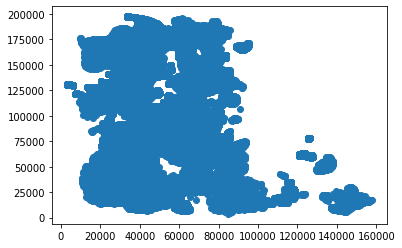

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x_t,y_t)

plt.show()

# this plots all x,y coords where tumor is true/present

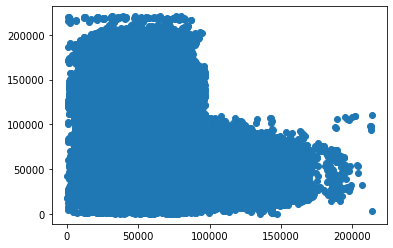

In [18]:
plt.scatter(x_f,y_f)

plt.show()

# this plots all x,y coords where tumor is false / not present

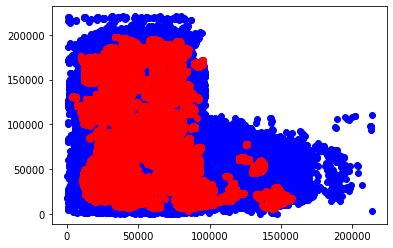

In [19]:
plt.scatter(x_f,y_f, c = 'b')
plt.scatter(x_t,y_t, c = 'r')

plt.show()

# red indicates tumor is true; false indicates not true

In [21]:
x_tumorTrue_centerTrue = []
y_tumorTrue_centerTrue = []

x_tumorTrue_centerFalse = []
y_tumorTrue_centerFalse = []

x_tumorFalse_centerTrue = []
y_tumorFalse_centerTrue = []

x_tumorFalse_centerFalse = []
y_tumorFalse_centerFalse = []

for i in range(len(tumor_patch)):
    if tumor_patch[3][i] == 1 and df['center_tumor_patch'][i] == 1:
        x_tumorTrue_centerTrue.append(df['coord_x'][i])
        y_tumorTrue_centerTrue.append(df['coord_y'][i])
    elif tumor_patch[3][i] == 1 and df['center_tumor_patch'][i] == 0:
        x_tumorTrue_centerFalse.append(df['coord_x'][i])
        y_tumorTrue_centerFalse.append(df['coord_y'][i])
    elif tumor_patch[3][i] == 0 and df['center_tumor_patch'][i] == 1:
        x_tumorFalse_centerTrue.append(df['coord_x'][i])
        y_tumorFalse_centerTrue.append(df['coord_y'][i])
    else:
        x_tumorFalse_centerFalse.append(df['coord_x'][i])
        y_tumorFalse_centerFalse.append(df['coord_y'][i])

<function matplotlib.pyplot.show(*args, **kw)>

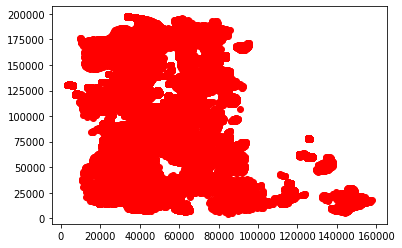

In [22]:
plt.scatter(x_tumorTrue_centerTrue, y_tumorTrue_centerTrue, c = 'r')
plt.show
# this plots all x,y coords where tumor is true/present and tumor is center

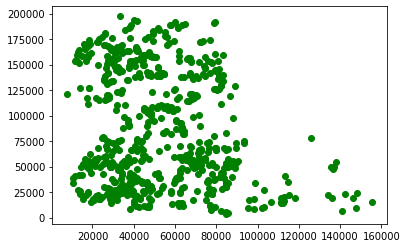

In [24]:
plt.scatter(x_tumorTrue_centerFalse, y_tumorTrue_centerFalse, c = 'g')
plt.show()

# this plots all x,y coords where tumor is true/present but tumor is NOT center

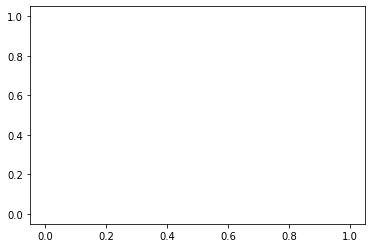

In [30]:
plt.scatter(x_tumorFalse_centerTrue, y_tumorFalse_centerTrue, c = 'b')
plt.show()

# this plots all x,y coords where tumor is false and tumor is center
# clearly none fall in this category

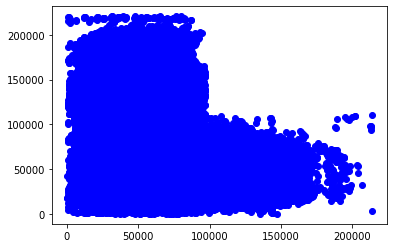

In [31]:
plt.scatter(x_tumorFalse_centerFalse, y_tumorFalse_centerFalse, c = 'b')
plt.show()

# this plots all x,y coords where tumor is false and tumor is Not center

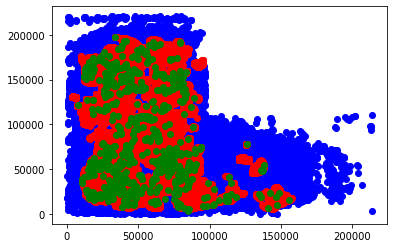

In [32]:
plt.scatter(x_tumorFalse_centerFalse, y_tumorFalse_centerFalse, c = 'b')
plt.scatter(x_tumorTrue_centerTrue, y_tumorTrue_centerTrue, c = 'r')
plt.scatter(x_tumorTrue_centerFalse, y_tumorTrue_centerFalse, c = 'g')
plt.show()

# blue = tumor is false and not center
# red = tumor is true and is center
# green = tumor is true and not center

In [ ]:
# if these two blocks below are run
# a decision tree is printed
# but the decision tree is too large to show any detail

# need to create bins for x,y coords ... 

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df,tumor_patch)

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=df.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [ ]:
# so far unable to get this part of the code to run/work

In [ ]:
import xgboost as xgb

train = xgb.DMatrix(df, label= tumor_patch[3])

In [ ]:
param = {
    'max_depth': 5,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 2} 
epochs = 10 

In [ ]:
model = xgb.train(param, train, epochs)

In [ ]:
test = xgb.DMatrix(X_test, label= Y_test)

In [ ]:
predictions = model.predict(test)
print(predictions)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, predictions)